# Final Project - NBA 2019 - 2020
This Dataset is all the stats from all the legues that play basketball. I am curious to see how the game was effect by the pandimic before and after. Also, I just want to see different parts of the world league differ from the NBA.

## Downloading the Dataset

I am downloading the dataset.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

In [1]:
dataset_url = 'https://www.kaggle.com/jacobbaruch/basketball-players-stats-per-season-49-leagues?select=players_stats_by_season_full_details.csv' 

In [2]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mrposh
Your Kaggle Key: ········


100%|██████████| 2.77M/2.77M [00:00<00:00, 193MB/s]

The dataset has been downloaded and extracted.

In [5]:
data_dir = './basketball-players-stats-per-season-49-leagues'

In [6]:
import os
os.listdir(data_dir)

['players_stats_by_season_full_details.csv']

Let us save and upload our work to Jovian before continuing.

In [7]:
project_name = "zerotopandas-final-project" # change this (use lowercase letters and hyphens only)

In [8]:
!pip install jovian --upgrade -q

In [9]:
import jovian

In [10]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ········
[jovian] Updating notebook "josh-ramrz/zerotopandas-final-project" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/josh-ramrz/zerotopandas-final-project


'https://jovian.ml/josh-ramrz/zerotopandas-final-project'

## Data Preparation and Cleaning

I will be taking only the 2019 - 2020 season too see how the pandemic effect the leagues.



In [11]:
import pandas as pd
# Here is the first 10 rows of the dataframe
DF = pd.read_csv('./basketball-players-stats-per-season-49-leagues/players_stats_by_season_full_details.csv')
DF_19_20 = DF.groupby('Season').get_group('2019 - 2020')
DF_19_20 = DF_19_20[["League",
             'Season',
             'Player',
             'Team',
             'GP',
             'MIN',
             'FGM',
             'FGA',
             '3PA',
              '3PM',
             'FTM',
             'FTA',
             'TOV',
             'PF',
             'ORB',
             'DRB',
             'REB',
             'AST',
             'STL',
              'BLK',
              'PTS',
              'birth_year']]
print(f'The shape of the 2019-2020 season dataset is {DF_19_20.shape}')

The shape of the 2019-2020 season dataset is (7116, 22)


In [12]:
DF_19_20.head(10)

,League,Season,Player,Team,GP,MIN,FGM,FGA,3PA,3PM,...,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,birth_year
0,NBA,2019 - 2020,James Harden,HOU,68,2482.6,672,1514,843,299,...,308,227,70,376,446,512,125,60,2335,1989.0
1,NBA,2019 - 2020,Damian Lillard,POR,66,2473.7,624,1349,674,270,...,194,114,33,251,284,530,70,22,1978,1990.0
2,NBA,2019 - 2020,Devin Booker,PHX,70,2511.8,627,1283,398,141,...,264,213,29,268,297,456,49,18,1863,1996.0
3,NBA,2019 - 2020,Giannis Antetokounmpo,MIL,63,1916.9,685,1238,293,89,...,230,195,140,716,856,354,61,66,1857,1994.0
4,NBA,2019 - 2020,Trae Young,ATL,60,2120.1,546,1249,568,205,...,289,104,32,223,255,560,65,8,1778,1998.0
5,NBA,2019 - 2020,Luka Doncic,DAL,61,2047.3,581,1255,541,171,...,260,153,78,495,573,538,60,14,1759,1999.0
6,NBA,2019 - 2020,Bradley Beal,WAS,57,2053.2,593,1303,481,170,...,194,126,52,190,242,347,71,23,1742,1993.0
7,NBA,2019 - 2020,LeBron James,LAL,67,2316.3,643,1303,425,148,...,261,118,65,459,524,684,78,36,1698,1984.0
8,NBA,2019 - 2020,Donovan Mitchell,UTA,69,2364.0,602,1342,473,173,...,184,172,53,251,304,294,70,14,1655,1996.0
9,NBA,2019 - 2020,Anthony Davis,LAL,62,2131.4,551,1096,218,72,...,154,156,143,435,578,200,91,143,1618,1993.0


In [13]:
NBA_19_20 = DF[DF['League'] == 'NBA'].groupby('Season').get_group('2019 - 2020')

In [14]:
# Here is the 2019-2020 NBA season. I wanted to see how their games effect before the pandimic

#NBA_19_20.drop(['birth_month','birth_date', 'height', 'height_cm', 'weight', 'weight_kg','nationality', 'high_school'], axis=1)
NBA_19_20 = NBA_19_20[["League",
             'Season',
             'Player',
             'Team',
             'GP',
             'MIN',
             'FGM',
             'FGA',
             '3PA',
              '3PM',
             'FTM',
             'FTA',
             'TOV',
             'PF',
             'ORB',
             'DRB',
             'REB',
             'AST',
             'STL',
              'BLK',
              'PTS',
              'birth_year']]
print(f'The shape of the NBA 2019-2020 season dataset is {NBA_19_20.shape}')

The shape of the NBA 2019-2020 season dataset is (278, 22)


In [15]:
ratio = NBA_19_20['3PM'] / NBA_19_20['3PA']
NBA_19_20['3PR'] = ratio
NBA_19_20['OVR'] = NBA_19_20['FGM']/ NBA_19_20['FGA']
NBA_19_20.head(10)

,League,Season,Player,Team,GP,MIN,FGM,FGA,3PA,3PM,...,ORB,DRB,REB,AST,STL,BLK,PTS,birth_year,3PR,OVR
0,NBA,2019 - 2020,James Harden,HOU,68,2482.6,672,1514,843,299,...,70,376,446,512,125,60,2335,1989.0,0.354686,0.443857
1,NBA,2019 - 2020,Damian Lillard,POR,66,2473.7,624,1349,674,270,...,33,251,284,530,70,22,1978,1990.0,0.400593,0.462565
2,NBA,2019 - 2020,Devin Booker,PHX,70,2511.8,627,1283,398,141,...,29,268,297,456,49,18,1863,1996.0,0.354271,0.488698
3,NBA,2019 - 2020,Giannis Antetokounmpo,MIL,63,1916.9,685,1238,293,89,...,140,716,856,354,61,66,1857,1994.0,0.303754,0.553312
4,NBA,2019 - 2020,Trae Young,ATL,60,2120.1,546,1249,568,205,...,32,223,255,560,65,8,1778,1998.0,0.360915,0.437150
5,NBA,2019 - 2020,Luka Doncic,DAL,61,2047.3,581,1255,541,171,...,78,495,573,538,60,14,1759,1999.0,0.316081,0.462948
6,NBA,2019 - 2020,Bradley Beal,WAS,57,2053.2,593,1303,481,170,...,52,190,242,347,71,23,1742,1993.0,0.353430,0.455104
7,NBA,2019 - 2020,LeBron James,LAL,67,2316.3,643,1303,425,148,...,65,459,524,684,78,36,1698,1984.0,0.348235,0.493477
8,NBA,2019 - 2020,Donovan Mitchell,UTA,69,2364.0,602,1342,473,173,...,53,251,304,294,70,14,1655,1996.0,0.365751,0.448584
9,NBA,2019 - 2020,Anthony Davis,LAL,62,2131.4,551,1096,218,72,...,143,435,578,200,91,143,1618,1993.0,0.330275,0.502737


In [ ]:
import jovian

In [16]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "josh-ramrz/zerotopandas-final-project" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/josh-ramrz/zerotopandas-final-project


'https://jovian.ml/josh-ramrz/zerotopandas-final-project'

## Exploratory Analysis and Visualization

I will be using a scatter plot to see the 3 points attempted and 3 points made. I will use a histogram for the ages.



In [17]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Three point scatter plot

This is the graph of players that shot 3 pointers in the 2019-2020 season in the nba. The plyer with the most threes and most taken is James Harden. He made 299 threes out of 843 shot attempted. That is roughly 35%. He could made more if the season was not cut short from the pandimic.

In [18]:
NBA_19_20.sort_values('3PM', ascending=False).head(10)
NBA_19_20[['Player', '3PM', '3PA', '3PR']].head(10)

,Player,3PM,3PA,3PR
0,James Harden,299,843,0.354686
1,Damian Lillard,270,674,0.400593
2,Devin Booker,141,398,0.354271
3,Giannis Antetokounmpo,89,293,0.303754
4,Trae Young,205,568,0.360915
5,Luka Doncic,171,541,0.316081
6,Bradley Beal,170,481,0.353430
7,LeBron James,148,425,0.348235
8,Donovan Mitchell,173,473,0.365751
9,Anthony Davis,72,218,0.330275


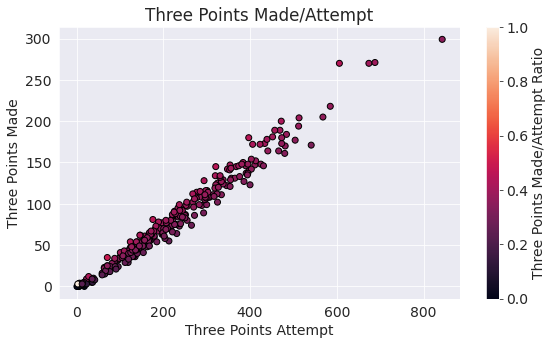

In [19]:
threePM = NBA_19_20['3PM']
threePA = NBA_19_20['3PA']
#threePA.head(10).to_frame()

plt.scatter(threePA, threePM, c=ratio, edgecolor='black')
cbar = plt.colorbar()
cbar.set_label('Three Points Made/Attempt Ratio')
plt.xlabel('Three Points Attempt')
plt.ylabel('Three Points Made')

plt.title('Three Points Made/Attempt')
plt.show()

# Average Age Histogram

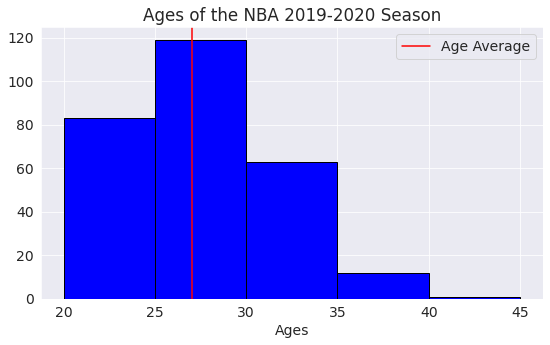

In [20]:
import numpy as np
Ages = 2020 - NBA_19_20['birth_year']
bins = [20,25,30,35,40,45]

plt.hist(Ages, bins=bins, edgecolor = 'black', color='blue')
plt.axvline(np.mean(Ages), color='red', label='Age Average')

plt.title('Ages of the NBA 2019-2020 Season')
plt.xlabel('Ages')
plt.legend()
plt.show()

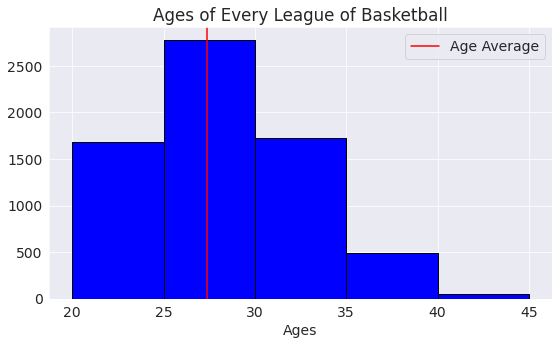

In [21]:
Age2 = 2020 - DF_19_20['birth_year']
bins = [20,25,30,35,40,45]

plt.hist(Age2, bins=bins, edgecolor = 'black', color='blue')
plt.axvline(np.mean(Age2), color='red', label='Age Average')

plt.title('Ages of Every League of Basketball')
plt.xlabel('Ages')
plt.legend()
plt.show()

I thought that The NBA league would have more youngers player than the international Leagues but they are roughly the same. 

# Points/TOV Bar Graph

Let's see the top five players with the turnovers and compare it to how many point they score.

In [22]:
NBA_19_20.columns

Index(['League', 'Season', 'Player', 'Team', 'GP', 'MIN', 'FGM', 'FGA', '3PA',
       '3PM', 'FTM', 'FTA', 'TOV', 'PF', 'ORB', 'DRB', 'REB', 'AST', 'STL',
       'BLK', 'PTS', 'birth_year', '3PR', 'OVR'],
      dtype='object')

In [23]:
turnovers = NBA_19_20.sort_values('TOV',ascending=False)[['Player', 'TOV','PTS']].head(10)
turnovers

,Player,TOV,PTS
0,James Harden,308,2335
4,Trae Young,289,1778
2,Devin Booker,264,1863
7,LeBron James,261,1698
5,Luka Doncic,260,1759
11,Russell Westbrook,255,1553
3,Giannis Antetokounmpo,230,1857
17,Nikola Jokic,226,1456
32,Ja Morant,220,1193
14,Zach LaVine,206,1530


Here is a bar graph to show the the top ten turnover in the NBA 2019 - 2020 season. 

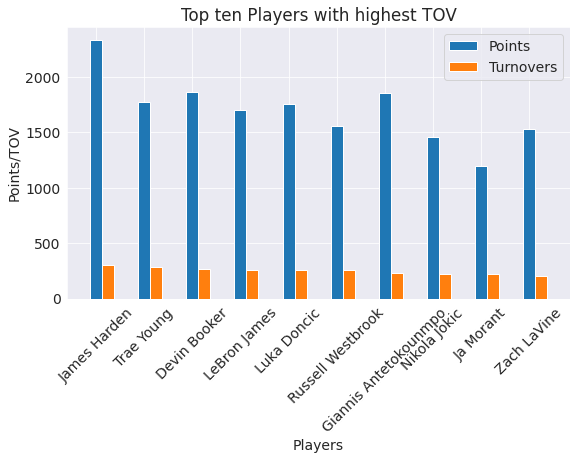

In [95]:
width = 0.25
xindex = np.arange(turnovers.shape[0])

plt.bar(xindex, turnovers['PTS'],width=width, label='Points')
plt.bar(xindex + width, turnovers['TOV'], width =width, label='Turnovers')

plt.xticks(ticks=xindex, labels=turnovers['Player'], rotation=45)
plt.legend()
plt.title('Top ten Players with highest TOV')
plt.xlabel('Players')
plt.ylabel('Points/TOV')
plt.show()

I thought that the players with the highest turnovers had the most points but I did not expect it to have a wide gap between points and turnovers. The reason for the turnovers are that the players have the ball in their hands for most of the game. They are likely to turnover the ball.

# Most Games played

We'll see the players that play the most games with more than 1200 points.

In [70]:
GP = NBA_19_20.sort_values('GP', ascending=False)[(NBA_19_20['PTS'] >=1200)]
GP[['Player','GP','PTS','AST']].head(10)

<ipython-input-70-5315335a3bd3>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  GP = NBA_19_20.sort_values('GP', ascending=False)[(NBA_19_20['PTS'] >=1200)]


,Player,GP,PTS,AST
17,Nikola Jokic,73,1456,512
19,Buddy Hield,72,1382,213
18,Tobias Harris,72,1410,227
22,Shai Gilgeous-Alexander,70,1331,232
2,Devin Booker,70,1863,456
10,C.J. McCollum,70,1556,310
28,Chris Paul,70,1232,472
8,Donovan Mitchell,69,1655,294
0,James Harden,68,2335,512
15,DeMar DeRozan,68,1504,379


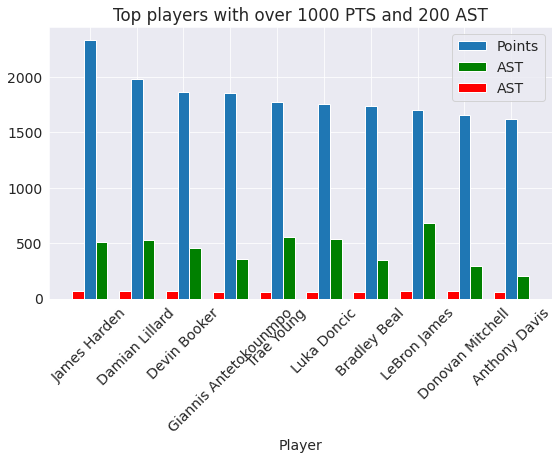

In [96]:
width = .25
x_index = np.arange(10)

plt.bar(x_index, NBA_19_20['PTS'].head(10), width = width, label = 'Points')
plt.bar(x_index + width, NBA_19_20['AST'].head(10), width = width, label='AST', color='green')
plt.bar(x_index - width, NBA_19_20['GP'].head(10), width = width, label='AST', color='red')

plt.xticks(ticks=x_index, labels=NBA_19_20['Player'].head(10), rotation=45)
plt.legend()
plt.title('Top players with over 1000 PTS and 200 AST')
plt.xlabel('Player')
plt.show()

In [21]:
import jovian

In [51]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "josh-ramrz/zerotopandas-final-project" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/josh-ramrz/zerotopandas-final-project


'https://jovian.ml/josh-ramrz/zerotopandas-final-project'

## Asking and Answering Questions



Here is a summary of the Whole league.

In [23]:
DF_19_20.describe()

,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,...,DRB,REB,AST,STL,BLK,PTS,birth_year,height_cm,weight,weight_kg
count,7116.000000,7116.000000,7116.000000,7116.000000,7116.000000,7116.000000,7116.000000,7116.000000,7116.000000,7116.000000,...,7116.000000,7116.000000,7116.000000,7116.000000,7116.000000,7116.000000,6976.000000,7080.000000,5945.000000,5945.000000
mean,21.569562,466.311411,70.961776,154.013491,20.693367,59.126476,33.113125,44.820405,28.962198,44.854272,...,57.647274,78.634907,42.215992,16.409359,6.023187,195.755762,1992.602494,196.499294,204.883768,92.964844
std,11.225702,338.236226,67.578446,141.081920,24.304010,63.933267,38.227455,48.446533,24.492478,29.125497,...,57.053366,76.272574,49.333462,14.408470,10.462523,186.896736,4.700259,8.645586,24.800756,11.250076
min,1.000000,13.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1970.000000,160.000000,130.000000,59.000000
25%,15.000000,249.350000,29.000000,68.000000,4.000000,16.000000,10.000000,15.000000,13.000000,26.000000,...,24.000000,32.000000,13.000000,7.000000,1.000000,80.000000,1989.000000,191.000000,186.000000,84.000000
50%,20.000000,401.400000,56.000000,123.000000,14.000000,44.000000,23.000000,33.000000,23.000000,40.000000,...,44.000000,59.000000,28.000000,13.000000,3.000000,154.000000,1993.000000,196.000000,202.000000,92.000000
75%,25.000000,583.075000,91.000000,194.000000,29.000000,81.000000,43.000000,58.000000,38.000000,56.000000,...,72.000000,100.000000,53.000000,22.000000,7.000000,251.000000,1996.000000,203.000000,220.000000,100.000000
max,74.000000,2556.400000,685.000000,1514.000000,299.000000,843.000000,692.000000,800.000000,308.000000,278.000000,...,716.000000,916.000000,684.000000,132.000000,196.000000,2335.000000,2004.000000,229.000000,304.000000,138.000000


Here is a summary of the NBA league.

In [24]:
NBA_19_20.describe()

,GP,MIN,FGM,FGA,3PA,3PM,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,birth_year,3PR
count,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,272.000000
mean,60.471223,1529.493885,263.384892,570.244604,220.327338,79.996403,117.323741,150.589928,88.449640,126.115108,61.593525,220.071942,281.665468,158.298561,48.381295,30.327338,724.089928,1992.956835,0.344688
std,8.773374,480.122947,138.945745,293.843148,146.876200,57.157677,98.720860,120.597718,53.935675,42.337322,47.988832,118.182606,156.545260,122.142460,23.877212,28.128715,396.580923,4.138174,0.086926
min,18.000000,268.500000,25.000000,71.000000,0.000000,0.000000,15.000000,20.000000,8.000000,27.000000,6.000000,37.000000,45.000000,8.000000,7.000000,0.000000,78.000000,1977.000000,0.000000
25%,56.000000,1167.750000,157.250000,331.500000,119.250000,37.250000,51.000000,70.250000,51.250000,98.000000,27.000000,133.250000,167.250000,77.000000,31.250000,12.000000,420.000000,1990.000000,0.325926
50%,61.500000,1567.900000,237.000000,527.000000,206.500000,72.500000,84.500000,111.000000,75.500000,124.000000,50.000000,196.500000,251.000000,114.500000,45.000000,22.000000,644.500000,1993.000000,0.354996
75%,66.000000,1908.625000,336.750000,753.000000,316.500000,114.750000,157.750000,194.750000,109.000000,155.750000,77.000000,275.500000,363.500000,211.250000,61.000000,38.750000,948.250000,1996.000000,0.385062
max,74.000000,2556.400000,685.000000,1514.000000,843.000000,299.000000,692.000000,800.000000,308.000000,278.000000,258.000000,716.000000,916.000000,684.000000,125.000000,196.000000,2335.000000,2000.000000,1.000000


# Top Scorers in every League

I want to know the top scorers of each of the leagues in the 2019 - 2020 season.

In [24]:
DF_19_20.League.unique()

array(['NBA', 'Euroleague', 'Israeli-BSL', 'Argentinian-Liga-A',
       'Australian-NBL', 'Austrian-A-Bundesliga', 'Balkan-BIL',
       'Belarusian-BPL', 'Belgium-Scooore-League', 'Bosnian-BiH-Liga',
       'Brazilian-NBB', 'British-BBL', 'Bulgarian-NBL', 'Canadian-NBL',
       'Chinese-CBA', 'Croatian-A-1-Liga', 'Czech-NBL',
       'Danish-Basketligaen', 'Estonian-Latvian-Basketball-League',
       'Eurocup', 'FIBA-Europe-Cup', 'Finnish-Korisliiga',
       'French-Jeep-Elite', 'Georgian-Super-Liga', 'German-BBL',
       'Greek-HEBA-A1', 'Hungarian-NBIA', 'Italian-Lega-Basket-Serie-A',
       'Japanese-BLeague', 'Kosovo-FBK', 'Lebanese-Division-A',
       'Lithuanian-LKL', 'Luxembourg-Total-League',
       'Macedonian-Superleague', 'Mexican-LNBP', 'Netherlands-DBL',
       'New-Zealand-NBL', 'Norwegian-BLNO', 'Polish-TBL',
       'Romanian-Divizia-A', 'Serbian-KLS', 'Slovakian-Extraliga',
       'Slovenian-SKL', 'South-Korean-KBL', 'Spanish-ACB',
       'Swedish-Basketligan', 'Swiss-LN

In [72]:
#DF_19_20.groupby('League').get_group('NBA').sort_values('PTS', ascending=False).head(1).Player.max()
#DF_19_20.groupby('League').get_group(i).PTS.max()
# This Looks really ugly
import pprint
D = {}
DF_19_20.groupby('League').get_group('NBA').PTS.max()
for i in DF_19_20.League.unique():
    Player = DF_19_20.groupby('League').get_group(i).sort_values('PTS', ascending=False).head(1).Player.max()
    points = DF_19_20.groupby('League').get_group(i).PTS.max()
    D[i] = [Player,points]
pprint.pprint(D)

{'Argentinian-Liga-A': ['Kelsey Barlow', 507],
 'Australian-NBL': ['Marcos Knight', 429],
 'Austrian-A-Bundesliga': ['Anton Shoutvin', 486],
 'Balkan-BIL': ['Nemanja Simovic', 160],
 'Belarusian-BPL': ['Timofey Verevkin', 501],
 'Belgium-Scooore-League': ['Hugh Robertson', 334],
 'Bosnian-BiH-Liga': ['Marko Rikalo', 393],
 'Brazilian-NBB': ['Shammell Stallworth', 489],
 'British-BBL': ['Lovell Cook', 267],
 'Bulgarian-NBL': ['Dimitar Marincheshki', 384],
 'Canadian-NBL': ['Antoine Mason', 617],
 'Chinese-CBA': ['Joe Young', 1687],
 'Croatian-A-1-Liga': ['Antonio Jordano', 378],
 'Czech-NBL': ['Jakub Sirina', 509],
 'Danish-Basketligaen': ['Patrick Burke', 406],
 'Estonian-Latvian-Basketball-League': ['Joonas Jarvelainen', 477],
 'Eurocup': ['Errick McCollum', 274],
 'Euroleague': ['Mike James', 590],
 'FIBA-Europe-Cup': ['Trae Golden', 278],
 'Finnish-Korisliiga': ['B.J. Raymond', 726],
 'French-Jeep-Elite': ['Ian Miller', 430],
 'Georgian-Super-Liga': ['James Milliken', 287],
 'German

Here is the top scorers in the every Professnoal league. James Harden from the NBA has the most points and that's only because all the other leagues have not play the same amount of games as the NBA.

# Top Players 3 point Ratio

Let's go back to the graph that had the three point ratio.

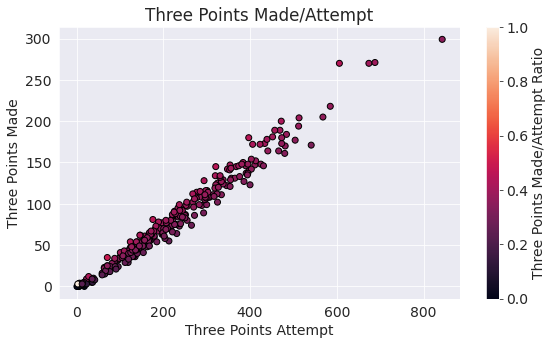

In [60]:
threePM = NBA_19_20['3PM']
threePA = NBA_19_20['3PA']
#threePA.head(10).to_frame()

plt.scatter(threePA, threePM, c=ratio, edgecolor='black')
cbar = plt.colorbar()
cbar.set_label('Three Points Made/Attempt Ratio')
plt.xlabel('Three Points Attempt')
plt.ylabel('Three Points Made')

plt.title('Three Points Made/Attempt')
plt.show()

I want to see the top ten player three point ratio is, but the players had to make over 100 threes. The reason for that is because player who made over less than 100 will probalbly had  taken less three point shots. Therefore they are more likely to have a better ratio.

In [26]:
over_100 = NBA_19_20[NBA_19_20['3PM'] >= 100][['Player','3PA','3PM','3PR']]
over_100.head(10)

,Player,3PA,3PM,3PR
0,James Harden,843,299,0.354686
1,Damian Lillard,674,270,0.400593
2,Devin Booker,398,141,0.354271
4,Trae Young,568,205,0.360915
5,Luka Doncic,541,171,0.316081
6,Bradley Beal,481,170,0.353430
7,LeBron James,425,148,0.348235
8,Donovan Mitchell,473,173,0.365751
10,C.J. McCollum,512,194,0.378906
12,Jayson Tatum,469,189,0.402985


 In Basketball, have over a 35% 3PA means that the player is a really three point good shooter. So let's take a look at there overall shooting percatntage.


In [27]:
overall = NBA_19_20[NBA_19_20['3PM'] >= 100][['Player','FGM','FGA','OVR']]
overall.head(10)

,Player,FGM,FGA,OVR
0,James Harden,672,1514,0.443857
1,Damian Lillard,624,1349,0.462565
2,Devin Booker,627,1283,0.488698
4,Trae Young,546,1249,0.437150
5,Luka Doncic,581,1255,0.462948
6,Bradley Beal,593,1303,0.455104
7,LeBron James,643,1303,0.493477
8,Donovan Mitchell,602,1342,0.448584
10,C.J. McCollum,611,1356,0.450590
12,Jayson Tatum,552,1226,0.450245


# What team had the best Overall shooting %?

Let's find out what team had the best Overall shooting percentage.

In [31]:
Teams = NBA_19_20.groupby('Team')
Teamovr = (Teams['FGM'].sum() / Teams['FGA'].sum()).to_frame()
Teamovr.sort_values(0, ascending=False)

,0
Team,
LAL,0.483664
DEN,0.481552
OKC,0.480979
UTA,0.480484
IND,0.480385
MIL,0.476732
MEM,0.476685
SAS,0.469109
DET,0.467805


In [39]:
round(Teamovr.loc['LAL'] * 100,2) 

0    48.37
Name: LAL, dtype: float64

In [46]:
print(f'The team with the highest percentage is LA Lakers with a percentage of {round(Teamovr.max().max(),3) * 100}%')

The team with the highest percentage is LA Lakers with a percentage of 48.4%


# Young Genration

We will be looking at the top ten youngest players. We say 23 or less and they had to score more than 1000 points, 200 ast, 200 rebs.

In [104]:
NBA_19_20['age'] = 2020 - NBA_19_20['birth_year'] 
young_ply = NBA_19_20[NBA_19_20['age'] <= 23]
stats = young_ply[(young_ply['PTS'] >= 1000) & (young_ply['AST'] >= 200) & (young_ply['REB'] >= 200)]
stats[['Player','PTS','AST','REB','age']].head(10)

,Player,PTS,AST,REB,age
4,Trae Young,1778,560,255,22.0
5,Luka Doncic,1759,538,573,21.0
12,Jayson Tatum,1547,200,460,22.0
16,Brandon Ingram,1477,259,379,23.0
22,Shai Gilgeous-Alexander,1331,232,412,22.0
32,Ja Morant,1193,488,258,21.0
44,Bam Adebayo,1146,368,735,23.0
50,Jamal Murray,1091,284,236,23.0


In [114]:
import jovian

In [105]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "josh-ramrz/zerotopandas-final-project" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/josh-ramrz/zerotopandas-final-project


'https://jovian.ml/josh-ramrz/zerotopandas-final-project'

## Inferences and Conclusion



Overall, I made graphs on the 3 point ratio and the Overage age in the NBA. The question I ask were all answer but I wish I had the data for the playoffs as well to compare stats from the regular season. I would have to wait on that data since the NBA_19_20 season just ended a couple October 11, 2020. That is usually not when it ends but since the pandemic started the season was suspended. This is all I came up with the information that was given. I had a great time looking over the data. I would like to thank Jovian and freecodecamp for jumpstarting my path to data anaylsis.

In [27]:
import jovian

In [106]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "josh-ramrz/zerotopandas-final-project" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/josh-ramrz/zerotopandas-final-project


'https://jovian.ml/josh-ramrz/zerotopandas-final-project'

In [29]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
